## **AMMI Bootcamp In-class Project**

In [ ]:
!mkdir data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

 AMMI_BootCamp_Day_1.ipynb   data		       train_data.txt
'Colab Notebooks'	     Part2_Lab_Exercises.pdf
 company_sales_data.csv      test_data.txt


In [6]:
%cd /content/drive/MyDrive/Data/AMMI2021_Bootcamp_project/

/content/drive/MyDrive/Data/AMMI2021_Bootcamp_project


In [7]:
!ls

'In-class Project.pdf'	 model.py    test_data.txt    utils.py
 main.py		 README.md   train_data.txt   visualizations.ipynb


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Task 1**

In [9]:
headers = ['ID', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'class']

In [11]:
df = pd.read_csv('train_data.txt', header=None)
df.columns = headers

In [12]:
df.head()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,class
0,0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,0.355260,1
1,1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,0.155274,1
2,2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,0.228560,1
3,3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,0.137905,1
4,4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,0.232766,1


## **Task 2**

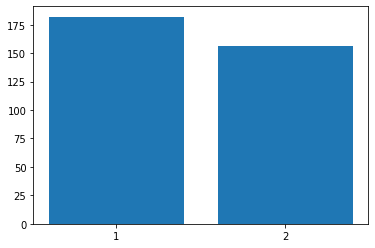

In [13]:
plt.bar(df['class'].unique(), df['class'].value_counts())
plt.xticks(df['class'].unique())
plt.show()

## **Task 3**

### Features vs Features

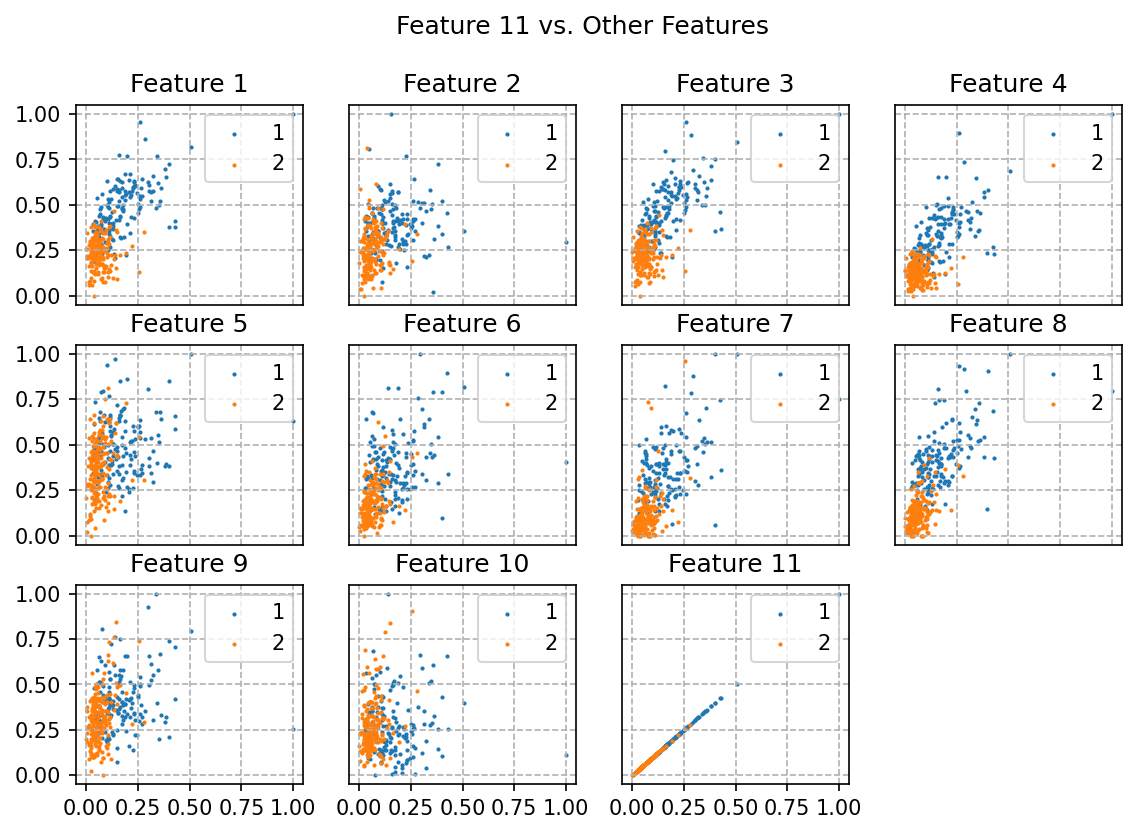

In [17]:
def plot_scatter(data, head, n):
  plt.figure(figsize=(9,6),dpi=150)
  ticks = [0,.25,0.5,0.75,1]
  j = 1
  for i in range(1,len(head[1:-1])+1):
    # if i != n:
    plt.subplot(3,4,j)
    plt.scatter(data.loc[data['class'] == 1][head[n]], data.loc[data['class'] == 1][head[i]], label=1, s=1)
    plt.scatter(data.loc[data['class'] == 2][head[n]], data.loc[data['class'] == 2][head[i]], label=2, s=1)
    if i < 9: plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if (i != 1) and (i != 5) and (i != 9): plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    plt.title(f'Feature {i}')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.grid(linestyle='--')
    plt.legend()
    j += 1
  plt.suptitle(f'Feature {n} vs. Other Features')
  plt.show()

plot_scatter(df, headers, 11)

**Features vs. them selves**

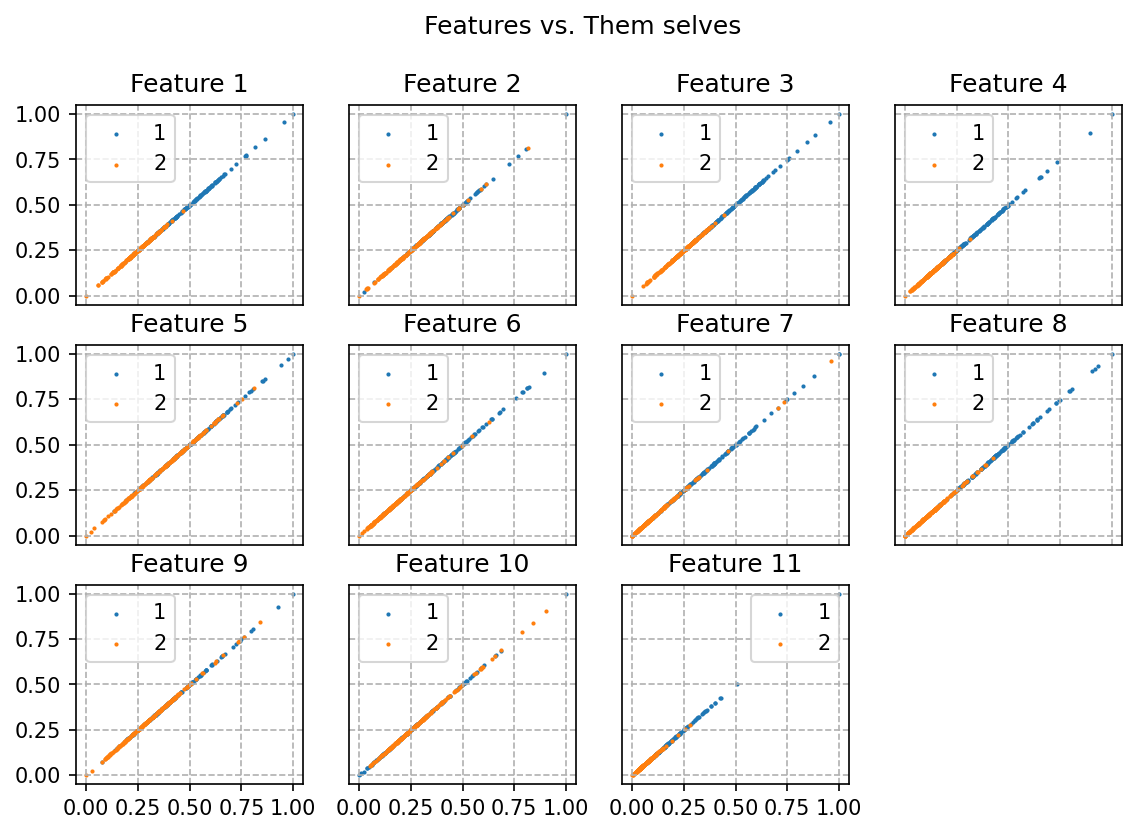

In [15]:
def plot_scatter(data, head):
  plt.figure(figsize=(9,6),dpi=150)
  ticks = [0,.25,0.5,0.75,1]
  for i in range(1,len(head[1:-1])+1):
    plt.subplot(3,4,i)
    plt.scatter(data.loc[data['class'] == 1][head[i]], data.loc[data['class'] == 1][head[i]], label=1, s=1)
    plt.scatter(data.loc[data['class'] == 2][head[i]], data.loc[data['class'] == 2][head[i]], label=2, s=1)
    if i < 9: plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if (i != 1) and (i != 5) and (i != 9): plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    plt.title(f'Feature {i}')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.grid(linestyle='--')
    plt.legend()
  plt.suptitle(f'Features vs. Them selves')
  plt.show()

plot_scatter(df, headers)

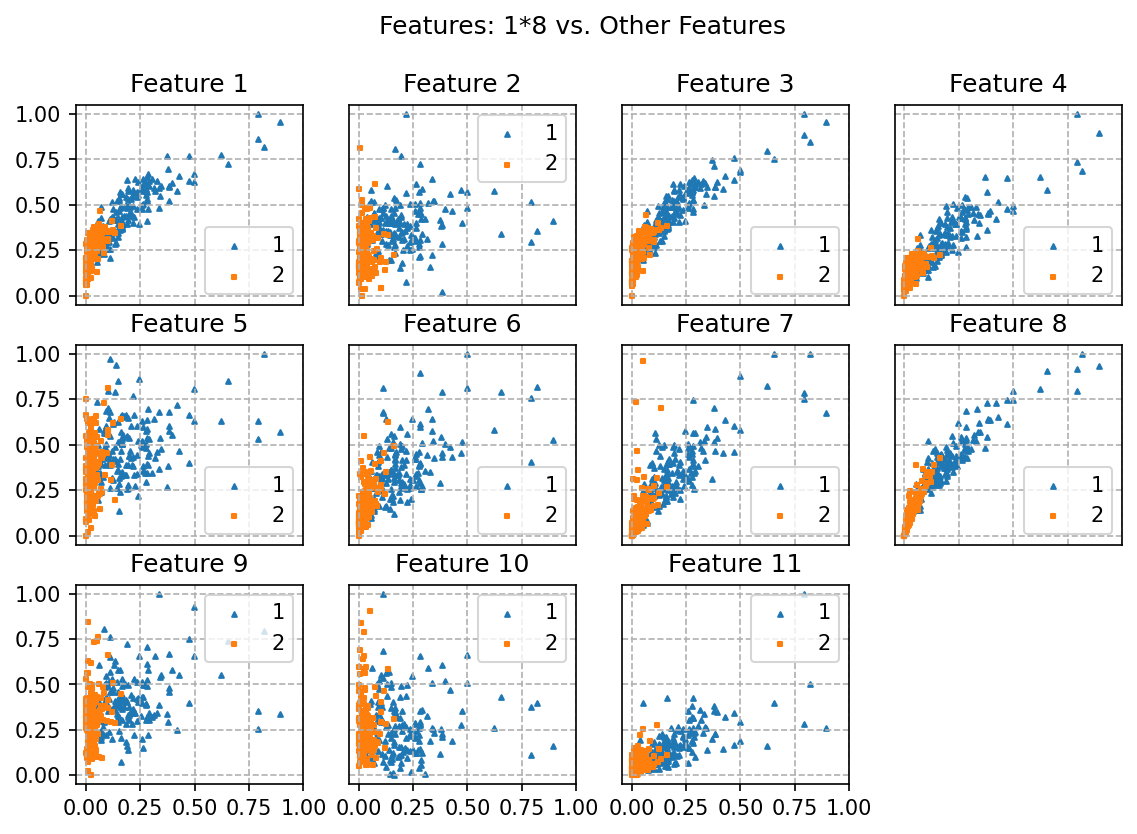

In [66]:
def plot_scatter(data, head, n, m):
  plt.figure(figsize=(9,6),dpi=150)
  ticks = [0,.25,0.5,0.75,1]
  j = 1
  for i in range(1,len(head[1:-1])+1):
    plt.subplot(3,4,j)
    plt.scatter(data.loc[data['class'] == 1][head[n]]*data.loc[data['class'] == 1][head[m]], data.loc[data['class'] == 1][head[i]], label=1, s=5, marker='^')
    plt.scatter(data.loc[data['class'] == 2][head[n]]*data.loc[data['class'] == 2][head[m]], data.loc[data['class'] == 2][head[i]], label=2, s=5, marker='s')
    if i < 9: plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if (i != 1) and (i != 5) and (i != 9): plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    plt.title(f'Feature {i}')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.grid(linestyle='--')
    plt.legend()
    j += 1
  plt.suptitle(f'Features: {n}*{m} vs. Other Features')
  plt.show()

plot_scatter(df, headers, 1, 8)

In [177]:
def error(df):
  df_1 = df.drop(columns=['class','ID'])
  predictions=[]
  for i in range(df.shape[0]):
    sample = df_1.iloc[i]
    if ((sample['f4']+sample['f8']) < 0.45):
      predictions.append(2)
    else:
      predictions.append(1)
      
  error = sum(predictions == df['class'])

  return error/df.shape[0]
print('Train', error(df_train))
print('Test', error(df_test))

Train 0.9023668639053254
Test 0.9090909090909091
